## Exploratory Data Analysis

In [1]:
import pandas as pd
#import os

In [2]:
df = pd.read_csv("sales_full_data-1.csv")
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04-07-19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04-12-19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04-12-19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [3]:
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04-07-19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04-12-19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04-12-19 14:38,"669 Spruce St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
186846,259354,iPhone,1,700,09-01-19 16:00,"216 Dogwood St, San Francisco, CA 94016"
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


In [10]:
#files = [file for file in df]
all_data = pd.DataFrame() #Creating empty dataframe called ‘all_month_data’
all_data.head()

""


**1.Which month is highest and lowest sales?**

In [4]:
df = df.dropna(how="all")

df = df[df["Order Date"].str[0:2]!="Or"]
#add "Month" column
df["Month"] = df["Order Date"].str[0:2]
df["Month"] = df["Month"].astype("int32")

#add "Sales" column
df["Quantity Ordered"] = pd.to_numeric(df["Quantity Ordered"])
df["Price Each"] = pd.to_numeric(df["Price Each"])

df["Sales"] = df["Quantity Ordered"]*df["Price Each"]
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04-07-19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04-12-19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04-12-19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


In [5]:
df.groupby("Month").sum()
#print(df)
#print("Highest sales month", max(df["Sales"]))

,Quantity Ordered,Price Each,Sales
Month,,,
1,10903,1.811768e+06,1.822257e+06
2,13449,2.188885e+06,2.202022e+06
3,17005,2.791208e+06,2.807100e+06
4,20558,3.367671e+06,3.390670e+06
5,18667,3.135125e+06,3.152607e+06
6,15253,2.562026e+06,2.577802e+06
7,16072,2.632540e+06,2.647776e+06
8,13448,2.230345e+06,2.244468e+06
9,13109,2.084992e+06,2.097560e+06


In [6]:
import matplotlib.pyplot as plt

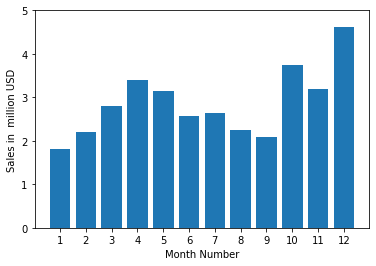

In [18]:
months = range(1,13)
result = df.groupby("Month").sum()

plt.bar(months,result["Sales"])
plt.xticks(months)
labels,location = plt.yticks()
plt.yticks(labels,(labels/1000000).astype(int))
#x.set_xticklabels(["January","February","March","April","May","June","July","August","September","October","November","December"])
plt.ylabel("Sales in  million USD")
plt.xlabel("Month Number")
plt.show()

**2.At  what time of the day would you put out advertisement so that sales increase?**

In [20]:
#Create new column in date-time Object 
df["DTO"] = pd.to_datetime(df["Order Date"])
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,DTO
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,2019-04-19 08:46:00
2,176559,Bose SoundSport Headphones,1,99.99,04-07-19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,2019-04-07 22:30:00
3,176560,Google Phone,1,600.00,04-12-19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,2019-04-12 14:38:00
4,176560,Wired Headphones,1,11.99,04-12-19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,2019-04-12 14:38:00
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,2019-04-30 09:27:00


Aggregate the period in 24-hours format

In [21]:
df["Hour"] = df["DTO"].dt.hour
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,DTO,Hour
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,2019-04-19 08:46:00,8
2,176559,Bose SoundSport Headphones,1,99.99,04-07-19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,2019-04-07 22:30:00,22
3,176560,Google Phone,1,600.00,04-12-19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,2019-04-12 14:38:00,14
4,176560,Wired Headphones,1,11.99,04-12-19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,2019-04-12 14:38:00,14
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,2019-04-30 09:27:00,9


In [22]:
result2 = df.groupby(["Hour"]).count()
result2

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,DTO
Hour,,,,,,,,,
0,3910,3910,3910,3910,3910,3910,3910,3910,3910
1,2350,2350,2350,2350,2350,2350,2350,2350,2350
2,1243,1243,1243,1243,1243,1243,1243,1243,1243
3,831,831,831,831,831,831,831,831,831
4,854,854,854,854,854,854,854,854,854
5,1321,1321,1321,1321,1321,1321,1321,1321,1321
6,2482,2482,2482,2482,2482,2482,2482,2482,2482
7,4011,4011,4011,4011,4011,4011,4011,4011,4011
8,6256,6256,6256,6256,6256,6256,6256,6256,6256


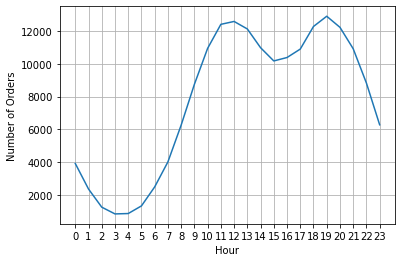

In [23]:
#PLOTTING
result2 = df.groupby(["Hour"])["Quantity Ordered"].count()
hours = [hour for hour,dff in df.groupby("Hour")]

plt.plot(hours,result2)
plt.xticks(hours)
plt.xlabel("Hour")
plt.ylabel("Number of Orders")
plt.grid()
plt.show()

**3.What products were sold the most?**


In [24]:
product_grp = df.groupby("Product")
product_grp.sum()

,Quantity Ordered,Price Each,Month,Sales,Hour
Product,,,,,
20in Monitor,4129,451068.99,29336,454148.71,58764
27in 4K Gaming Monitor,6244,2429637.70,44440,2435097.56,90916
27in FHD Monitor,7550,1125974.93,52558,1132424.50,107540
34in Ultrawide Monitor,6199,2348718.19,43304,2355558.01,89076
AA Batteries (4-pack),27635,79015.68,145558,106118.40,298342
AAA Batteries (4-pack),31017,61716.59,146370,92740.83,297332
Apple Airpods Headphones,15661,2332350.00,109477,2349150.00,223304
Bose SoundSport Headphones,13457,1332366.75,94113,1345565.43,192445
Flatscreen TV,4819,1440000.00,34224,1445700.00,68815


<ipython-input-25-b62c594e92ae>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(products,rotation = "vertical",size=8)


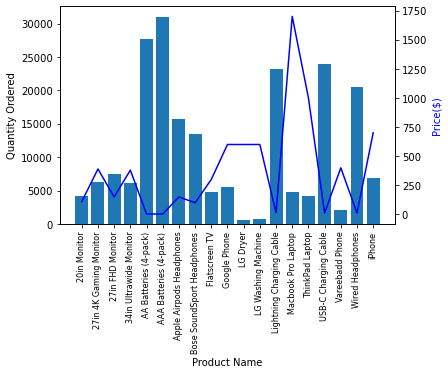

In [25]:
#Visualizing
quantity_ordered = product_grp.sum()["Quantity Ordered"]
prices = df.groupby("Product").mean()["Price Each"]
fig , ax1 = plt.subplots()
ax2 = ax1.twinx()

products = [product for product,df in product_grp]

ax1.bar(products,quantity_ordered)
ax2.plot(products,prices,"b-")
ax1.set_xlabel("Product Name")
ax1.set_ylabel("Quantity Ordered")
ax2.set_ylabel("Price($)",color="b")
ax1.set_xticklabels(products,rotation = "vertical",size=8)
plt.show()

**1.Which month had the highest and lowest sales?**

ans: Decemeber 12 th month 4.613443 has highest and January has lowest sales 1.822257

**2.At  what time of the day would you put out advertisement so that sales increase?**

ans:We can suggest to advertise the products right before 12 PM and/or 7 PM. It could be 11.30 AM and/or 6.30 PM.
    
**3.What products were sold the most?**

ans:AAA Batteries(4 pack) is the most sold product.